<font color="green" size="6" style="font-family:sans-serif">Telecom Customer Churn Prediction</font>

# Introduction

## Overview

<p>Customer churn is a big issue in any industry. Not surprisingly, one of the major focus of a data scientist is to reduce customer attrition and increase customer retention. It is relatively easier to predict and detect in the industries where monthly billing service exists Eg: telecom, internet, streaming service etc. From an organizational perspective, it is always cheaper to retain existing customer than to spend money to acquire new customer.</p>

## Problem Statement
</b>
<p>Building a logistic regression based model to predict whether the customer will churn out of telecom service or not, so that marketing team can build new strategies according to the recommendations.</p>

## Stakeholder

- <b>Marketing head of telecom company</b>

## Business Metric

- </b><p>Enhance the Customer churn prediction by 5%.</p>

## Confusion Metric

| | Actual  | Churn | No Churn |
|:---: |:-------------|:-----------|:------|
| Predicted | Churn  | TP | FP |
| | No Churn | FN | TN |

## Data Science Metric 

- <b>Recall</b>

# Load Libraries

## Import Libraries

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE,SelectKBest
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import f_classif, chi2, SelectFromModel
import xgboost

print('Setup Completed!')

Setup Completed!


## Loading Data

In [2]:
# Load Data

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn1.csv')
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Statistics of data

In [3]:
# Check the statistics of data

data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,776.000000,776.000000,776.000000,776.000000
mean,0.168814,32.010309,66.321521,2273.437693
std,0.374830,24.245144,29.424931,2206.673098
min,0.000000,1.000000,18.700000,19.150000
25%,0.000000,9.000000,44.337500,449.637500
50%,0.000000,29.000000,71.950000,1418.650000
75%,0.000000,54.000000,90.050000,3689.250000
max,1.000000,72.000000,117.500000,8670.100000


## Display Missing/Null values

In [4]:
# Check the missing/null values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
# Change the type of column TotalCharges to float

data['TotalCharges'] = data['TotalCharges'].astype(float)

# Explanatory Data Analysis

## Genderwise Customer Churn countplot

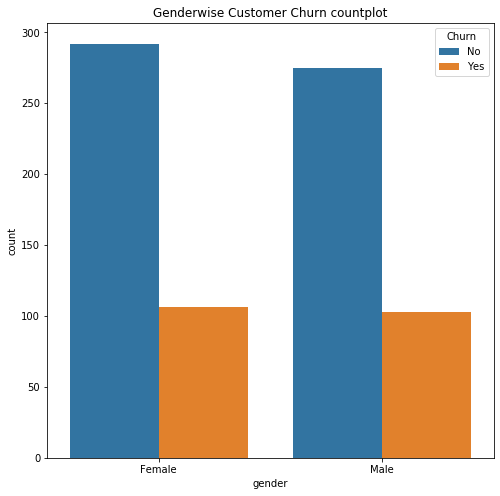

In [6]:
# Genderwise Customer Churn countplot
plt.figure(figsize=(8,8))
sns.countplot('gender', hue='Churn', data=data)
plt.title('Genderwise Customer Churn countplot')
plt.show()

<b>Insight:</b><br>
- Customer churn count is approximately same for both i.e. male and female. 

## Customer Churn countplot for senior citizen 

In [26]:
data.groupby(['Churn']).gender.value_counts()

Churn  gender
No     Female    292
       Male      275
Yes    Female    106
       Male      103
Name: gender, dtype: int64

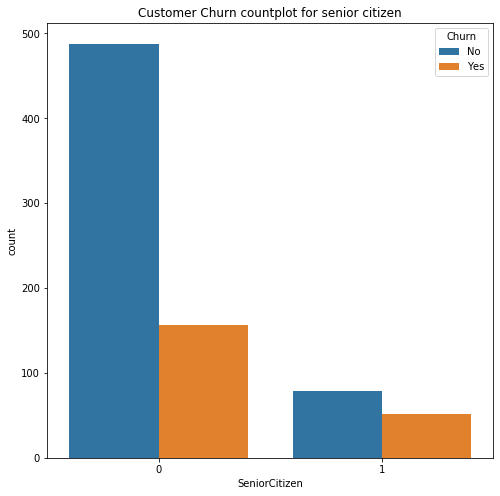

In [27]:
# Customer Churn countplot for senior citizen 
plt.figure(figsize=(8,8))
sns.countplot('SeniorCitizen', hue='Churn', data=data)
plt.title('Customer Churn countplot for senior citizen')
plt.show()

<b>Insight:</b><br>
- As compare to young citizens, more number of Senior citizens go for Customer churn.

## Contractwise Customer Churn countplot

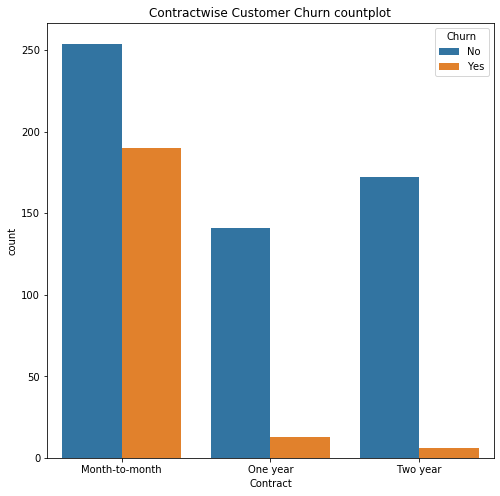

In [10]:
# Contractwise Customer Churn countplot
plt.figure(figsize=(8,8))
sns.countplot('Contract', hue='Churn', data=data)
plt.title('Contractwise Customer Churn countplot')
plt.show()

<b>Insight:</b><br>
- Month-to-month Contract customers have more chance to churn. While othre two type of contract customers are more stable.

<b>Recommendations:</b><br>
- As there is a large number of customer churn for month-to-month contract, so marketing team should have to build some new plans to attract such kind of customers.

## Countplot for services

In [31]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
data[['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']].head().T

,0,1,2,3,4
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No
DeviceProtection,No,Yes,No,Yes,No
TechSupport,No,No,No,Yes,No
StreamingTV,No,No,No,No,No
StreamingMovies,No,No,No,No,No


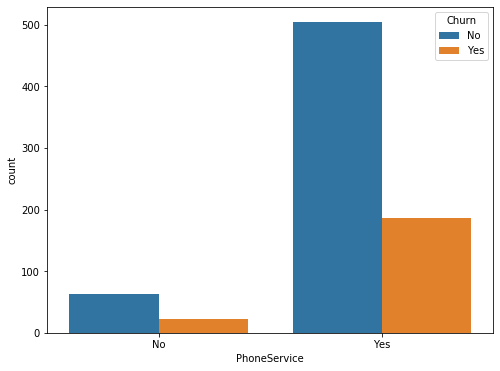

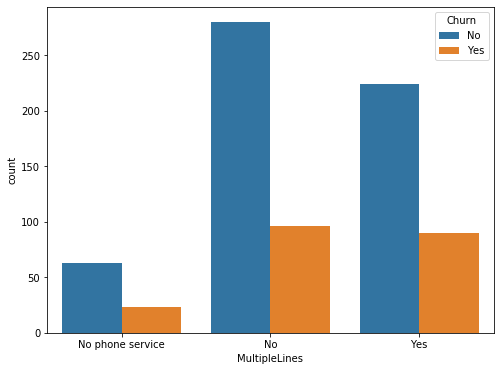

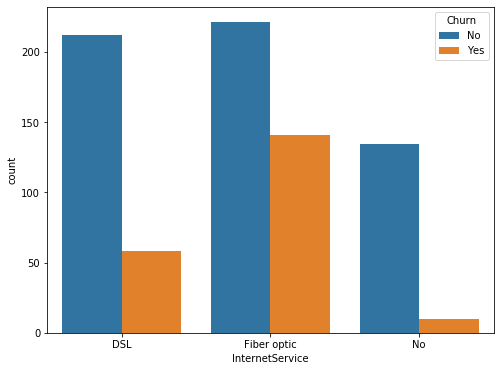

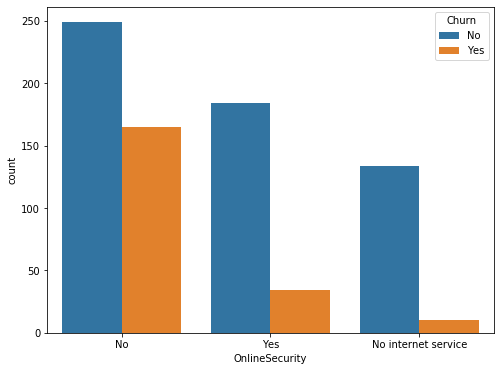

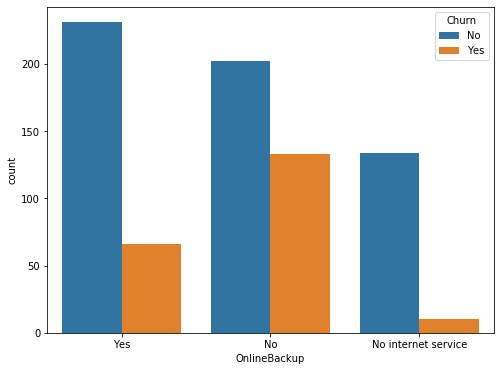

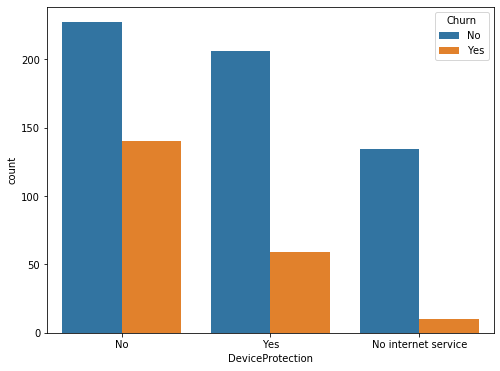

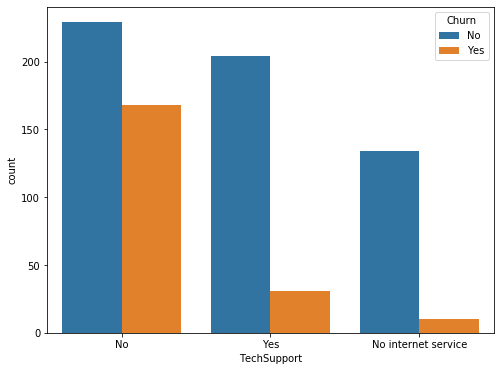

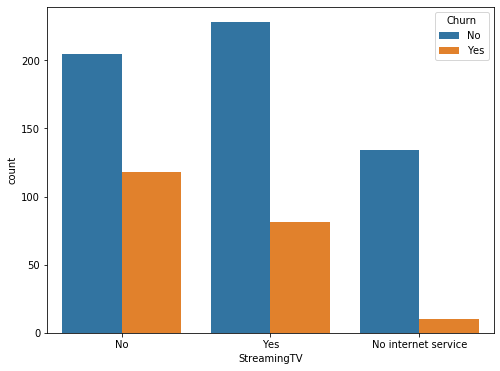

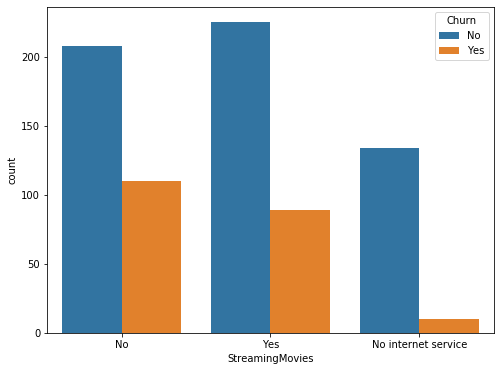

In [13]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

for ser in services:
    plt.figure(figsize=(8,6))
    sns.countplot(ser, hue='Churn', data=data)
    
plt.show()

## Payment Method wise Customer Churn countplot

In [13]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

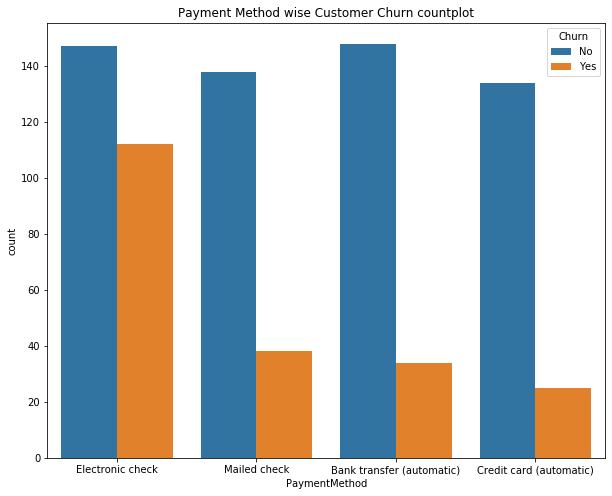

In [14]:
# Payment Method wise Customer Churn countplot
plt.figure(figsize=(10,8))
sns.countplot('PaymentMethod', hue='Churn', data=data)
plt.title('Payment Method wise Customer Churn countplot')
plt.show()

<b>Insight:</b><br>
- The customers having who pay with electronic check have more chances to churn.

# Feature Engineering

## Numerical/Categorical Data

In [4]:
data['Churn'] = data['Churn'].replace({'No': 0, 'Yes': 1})

In [5]:
data_new = data.drop(['customerID', 'Contract', 'PaperlessBilling'], axis=1)

data_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Electronic check,70.70,151.65,1


In [6]:
num_col = data_new.select_dtypes(include=np.number).columns
cat_col = data_new.select_dtypes(exclude=np.number).columns

In [7]:
cat_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod'],
      dtype='object')

## One Hot Encoding

In [8]:
# One Hot encoder to convert categorical column into numerical

X_cat = data[cat_col]
X_cat.head(2)
X_cat_one_hot = pd.get_dummies(X_cat, drop_first=True)

#Merge With original df
cat_proc_columns = X_cat_one_hot.columns
for col in cat_proc_columns:
    data_new[col] = X_cat_one_hot[col]

In [9]:
# Droping remaining categorical columns
data_new.drop(cat_col, axis=1, inplace=True)

In [10]:
data_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Feature Selection

## Numerical Data [Co-relation]

In [11]:
columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for col in columns:
    print('Unique values of column', col, data[col].unique())

Unique values of column gender ['Female' 'Male']
Unique values of column Partner ['Yes' 'No']
Unique values of column Dependents ['No' 'Yes']
Unique values of column PhoneService ['No' 'Yes']
Unique values of column MultipleLines ['No phone service' 'No' 'Yes']
Unique values of column InternetService ['DSL' 'Fiber optic' 'No']
Unique values of column OnlineSecurity ['No' 'Yes' 'No internet service']
Unique values of column OnlineBackup ['Yes' 'No' 'No internet service']
Unique values of column DeviceProtection ['No' 'Yes' 'No internet service']
Unique values of column TechSupport ['No' 'Yes' 'No internet service']
Unique values of column StreamingTV ['No' 'Yes' 'No internet service']
Unique values of column StreamingMovies ['No' 'Yes' 'No internet service']
Unique values of column Contract ['Month-to-month' 'One year' 'Two year']
Unique values of column PaperlessBilling ['Yes' 'No']
Unique values of column PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'C

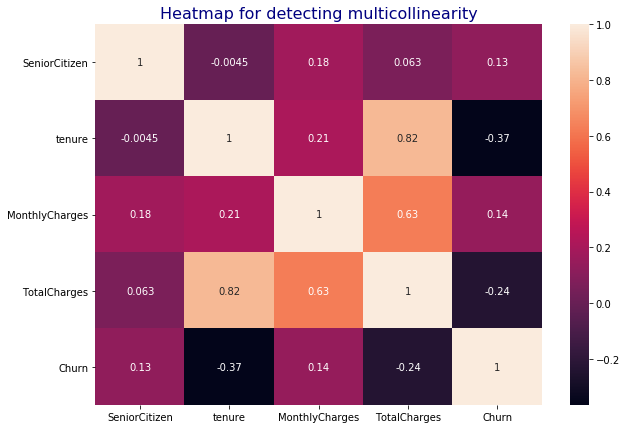

In [14]:
#ploting heatmap to check corelation in numerical feature in data.


fig = plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True)
plt.title('Heatmap for detecting multicollinearity', fontsize=16, color='navy')
plt.show()

## Numerical Input, Categorical Output ==> ANOVA

In [15]:
col = data.select_dtypes(include=np.number).columns
X_anova = data[col].drop('Churn', axis=1)
y_anova = data['Churn']

In [37]:
# Apply Anova and fit the random forest model on train data use df dataset
nof_list   = [1, 2, 3, 4]
high_score = 0
nof        = 0

for n in nof_list:
    test = SelectKBest(score_func = f_classif, k = n)
    X_train, X_test, y_train, y_test = train_test_split(X_anova, y_anova, test_size=0.3, random_state=0)
    X_train = test.fit_transform(X_train, y_train)
    X_test = test.transform(X_test)
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    
    if model.score(X_test, y_test) > high_score:
        high_score = model.score(X_test, y_test)
        model_ = model
        nof=n 
    print("High Score is:",high_score, "with features=",nof)

For no of features= 1 , score= 0.6866952789699571
High Score is: 0.6866952789699571 with features= 1
For no of features= 2 , score= 0.7639484978540773
High Score is: 0.7639484978540773 with features= 2
For no of features= 3 , score= 0.7682403433476395
High Score is: 0.7682403433476395 with features= 3
For no of features= 4 , score= 0.7553648068669528
High Score is: 0.7682403433476395 with features= 3


## Categorical Input, Categorical Output ==> CHI 2

In [12]:
X_cat = data[cat_col]
data_cat = pd.get_dummies(X_cat, drop_first=True)

data_cat.head(2)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [39]:
# Apply Chi2 and fit the random forest model on train data use df dataset
nof_list   = [1, 5, 10, 15, 20, 23]
high_score = 0
nof        = 0

for n in nof_list:
    test = SelectKBest(score_func = chi2 , k = n)
    X_train, X_test, y_train, y_test = train_test_split(data_cat, y_anova, test_size=0.3, random_state = 0)
    
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    
    if model.score(X_test,y_test) > high_score:
        high_score = model.score(X_test, y_test)
        model_ = model
        nof=n 
    print("High Score is:",high_score, "with features=",nof)

For no of features= 1 , score= 0.7424892703862661
High Score is: 0.7424892703862661 with features= 1
For no of features= 5 , score= 0.7424892703862661
High Score is: 0.7424892703862661 with features= 1
For no of features= 10 , score= 0.7553648068669528
High Score is: 0.7553648068669528 with features= 10
For no of features= 15 , score= 0.7510729613733905
High Score is: 0.7553648068669528 with features= 10
For no of features= 20 , score= 0.7081545064377682
High Score is: 0.7553648068669528 with features= 10
For no of features= 23 , score= 0.7296137339055794
High Score is: 0.7553648068669528 with features= 10


## Forward Selection

In [13]:
X_FS = data_new.drop(['Churn'], axis=1)
y_FS = data_new['Churn'].copy()

X_FS.shape

(776, 27)

In [53]:
from mlxtend.feature_selection import SequentialFeatureSelector

X_train, X_test, y_train, y_test = train_test_split(X_FS, y_FS, test_size=0.3, random_state = 0)
# import the algorithm you want to evaluate on your features.
from sklearn.ensemble import RandomForestRegressor

y_train = y_train.ravel()
y_test = y_test.ravel()

# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs = SequentialFeatureSelector(clf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# fit the object to the training data.
sfs.fit(X_train, y_train)

# print the selected features.
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

# print the final prediction score.
print(sfs.k_score_)

# transform to the newly selected features.
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.0min finished

[2020-12-12 21:11:04] Features: 1/10 -- score: 0.7311586816173973[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   56.9s finished

[2020-12-12 21:12:01] Features: 2/10 -- score: 0.7624872579001021[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   55.3s finished

[2020-12-12 21:12:57] Features: 3/10 -- score: 0.77353041114509[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

Index(['tenure', 'Dependents_Yes', 'MultipleLines_Yes', 'InternetService_No',
       'OnlineSecurity_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingMovies_No internet service', 'PaymentMethod_Mailed check'],
      dtype='object')
0.7790180088345225


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   39.1s finished

[2020-12-12 21:18:16] Features: 10/10 -- score: 0.7790180088345225

## Recursive Feature Elimination

In [55]:
from sklearn.feature_selection import RFE 

# create the RFE model and select 3 attributes
rfe = RFE(clf, 10)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns)))

[False  True  True  True  True False  True False False False  True False
 False  True False  True False False False  True False False False False
 False  True False]
[ 6  1  1  1  1  4  1 12 15  2  1 13 14  1 17  1 16  8  7  1  9  5 18  3
 11  1 10]
Features sorted by their rank:
[(1, 'Dependents_Yes'), (1, 'InternetService_Fiber optic'), (1, 'MonthlyCharges'), (1, 'OnlineBackup_Yes'), (1, 'OnlineSecurity_Yes'), (1, 'PaymentMethod_Electronic check'), (1, 'TechSupport_Yes'), (1, 'TotalCharges'), (1, 'gender_Male'), (1, 'tenure'), (2, 'MultipleLines_Yes'), (3, 'StreamingMovies_Yes'), (4, 'Partner_Yes'), (5, 'StreamingTV_Yes'), (6, 'SeniorCitizen'), (7, 'TechSupport_No internet service'), (8, 'DeviceProtection_Yes'), (9, 'StreamingTV_No internet service'), (10, 'PaymentMethod_Mailed check'), (11, 'PaymentMethod_Credit card (automatic)'), (12, 'PhoneService_Yes'), (13, 'InternetService_No'), (14, 'OnlineSecurity_No internet service'), (15, 'MultipleLines_No phone service'), (16, 'DevicePro

# Feature Importance

## Decision Tree Classifier

In [12]:
X = data_new.drop('Churn', axis=1)
y = data_new['Churn']

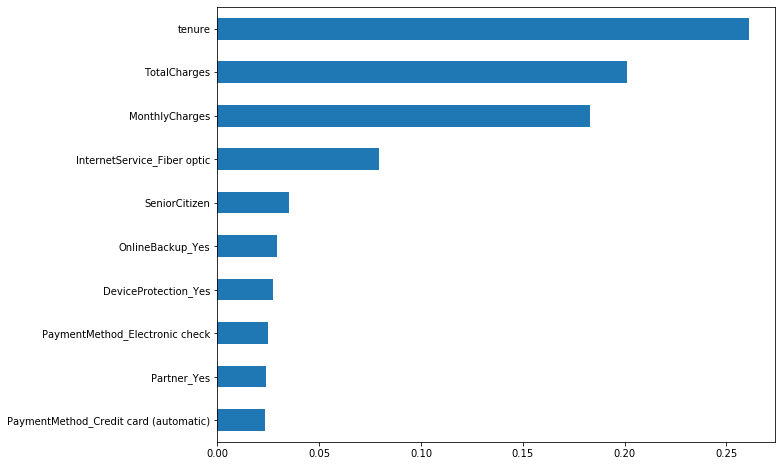

In [13]:
# Build a DecisionTreeClassifier and compute the feature importance

plt.figure(figsize=(10, 8))
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

model = SelectFromModel(dtc, prefit=True)
X_new = model.transform(X)

feat_importances = pd.Series(dtc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

In [16]:
print(feat_importances.nlargest(18).sort_values(ascending=False))

tenure                                   0.260951
TotalCharges                             0.201075
MonthlyCharges                           0.183025
InternetService_Fiber optic              0.079529
SeniorCitizen                            0.035219
OnlineBackup_Yes                         0.029435
DeviceProtection_Yes                     0.027484
PaymentMethod_Electronic check           0.024671
Partner_Yes                              0.023729
PaymentMethod_Credit card (automatic)    0.023355
OnlineSecurity_Yes                       0.019263
gender_Male                              0.017485
PhoneService_Yes                         0.016725
Dependents_Yes                           0.014256
TechSupport_Yes                          0.012538
PaymentMethod_Mailed check               0.009750
MultipleLines_Yes                        0.008060
StreamingTV_Yes                          0.004911
dtype: float64


## Extra Trees Classifier

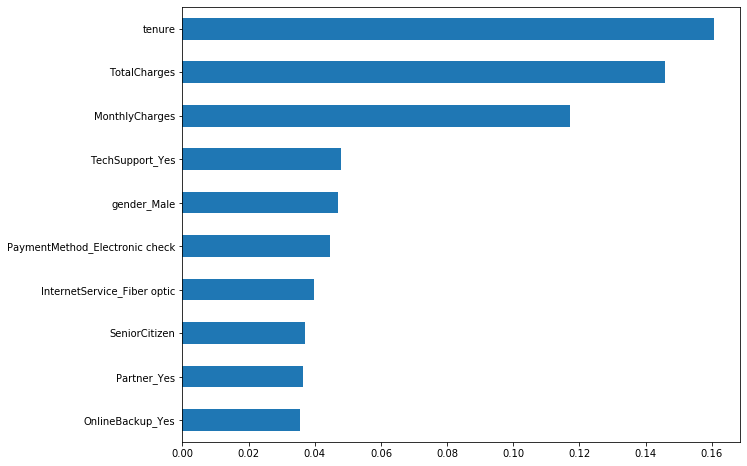

In [19]:
# Build a tree using ExtraTreesClassifier and compute the feature importances

plt.figure(figsize=(10,8))
tree = ExtraTreesClassifier(n_estimators=250, random_state=0)
tree.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(tree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

## XGBoost Classifier

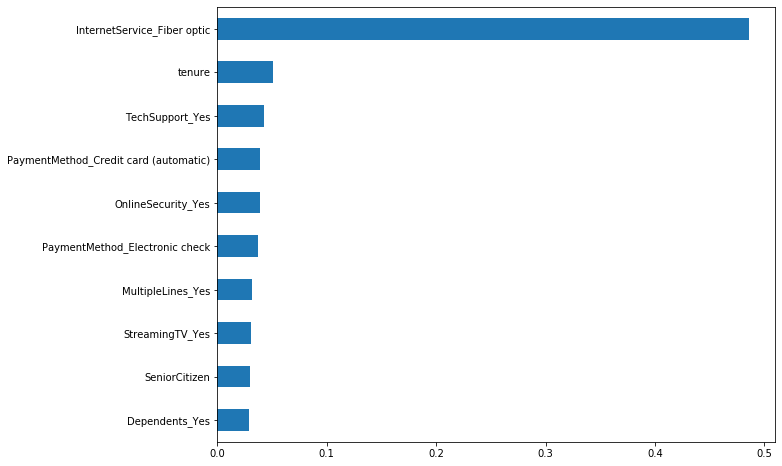

In [20]:
# Build a forest and compute the feature importances

plt.figure(figsize=(10,8))
XGB = XGBClassifier(n_estimators=250, random_state=0)
XGB.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(XGB.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

# Model Selection

## Imbalanced Dataset

In [17]:
X = data_new.drop('Churn', axis=1)
y = data_new['Churn']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print(X_train.shape, y_train.shape)

(620, 27) (620,)


## Balanced Dataset [Smote]

In [20]:
smote = SMOTE(random_state=10)
X_SMOTE, y_SMOTE = smote.fit_resample(X, y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_SMOTE, y_SMOTE, random_state=0, test_size=0.2)
print(X_train_smote.shape, y_train_smote.shape)

(907, 27) (907,)


## Balanced Dataset [SMOTE Tomek]

In [21]:
tomek = SMOTETomek(random_state=10)
X_tomek, y_tomek = tomek.fit_resample(X, y)
X_train_tomek, X_test_tomek, y_train_tomek, y_test_tomek = train_test_split(X_tomek, y_tomek, random_state=0, test_size=0.2)
print(X_train_tomek.shape, y_train_tomek.shape)

(801, 27) (801,)


## Models Building

In [29]:
models = {'Logistic Regression':LogisticRegression(),
          'Decision Tree Classifier (Gini)': DecisionTreeClassifier(criterion='gini'),
          'Decision Tree Classifier (Entropy)' : DecisionTreeClassifier(criterion='entropy'),
          'Random Forest Classifier':RandomForestClassifier(), 
          'Ada Boost Classifier' : AdaBoostClassifier(random_state=0),
          'XGBoost Classifier':XGBClassifier()}

In [76]:
#Evaluate All the algorithms

def model_building(model_data, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
    recalls = {}
    accuracies = {}
    
    for name, model in model_data.items():
        obj_model = model
        obj_model.fit(X_train,y_train)
        y_pred = obj_model.predict(X_test)
        print("=="*40)
        print(name)

        # Calculate accuracy , print out the Classification report and Confusion Matrix.
        accuracy_sc = accuracy_score(y_pred, y_test)
        print("Accuracy SCORE: ", accuracy_sc)
        recall_sc = recall_score(y_test, y_pred)
        print("Recall SCORE: ", recall_sc)
        print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred)) 
        print("ROC AUC SCORE: ", roc_auc_score(y_test, y_pred))
        print("==="*20)
        print("Classification Report: \n",classification_report(y_test,y_pred))
        print("=="*40)
        recalls[name] = recall_sc
        accuracies[name] = accuracy_sc
    
    plt.figure(figsize=(8,8))
    X = np.arange(len(recalls))
    ax = plt.subplot(111)
    ax.bar(X, recalls.values(), width=0.2, color='b', align='center')
    ax.bar(X-0.2, accuracies.values(), width=0.2, color='g', align='center')
    ax.legend(('Recall','Accuracy'))
    plt.xticks(X, recalls.keys(), rotation=90)
    plt.title("Algorithm Comparison for Recall and Accuracy score", fontsize=17)
    plt.show()

## Classification algorithms on Imbalanced Data 

With Imbalanced Data:
Logistic Regression
Accuracy SCORE:  0.7243589743589743
Recall SCORE:  0.42
Confusion Matrix: 
 [[92 14]
 [29 21]]
ROC AUC SCORE:  0.6439622641509434
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       106
           1       0.60      0.42      0.49        50

    accuracy                           0.72       156
   macro avg       0.68      0.64      0.65       156
weighted avg       0.71      0.72      0.71       156

Decision Tree Classifier (Gini)
Accuracy SCORE:  0.7115384615384616
Recall SCORE:  0.46
Confusion Matrix: 
 [[88 18]
 [27 23]]
ROC AUC SCORE:  0.6450943396226415
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       106
           1       0.56      0.46      0.51        50

    accuracy                           0.71       156
   macro avg       0.66      0.65      0.65       156
weighted avg     

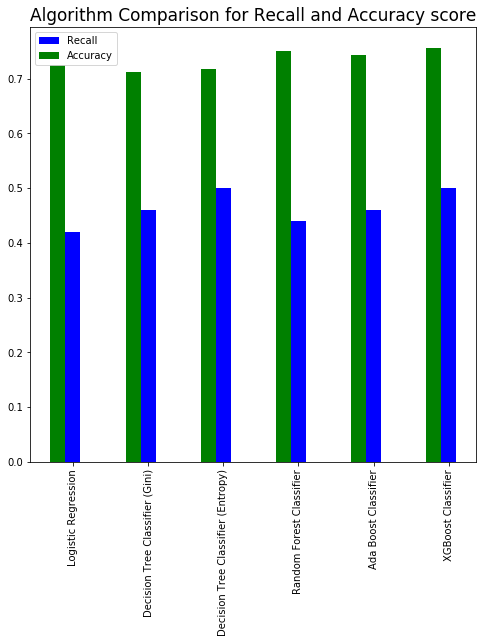

In [77]:
print('With Imbalanced Data:')
model_building(models, X, y)

## Classification algorithms on SMOTE Data 

With SMOTE:
Logistic Regression
Accuracy SCORE:  0.7929515418502202
Recall SCORE:  0.8166666666666667
Confusion Matrix: 
 [[82 25]
 [22 98]]
ROC AUC SCORE:  0.7915109034267913
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       107
           1       0.80      0.82      0.81       120

    accuracy                           0.79       227
   macro avg       0.79      0.79      0.79       227
weighted avg       0.79      0.79      0.79       227

Decision Tree Classifier (Gini)
Accuracy SCORE:  0.7444933920704846
Recall SCORE:  0.7416666666666667
Confusion Matrix: 
 [[80 27]
 [31 89]]
ROC AUC SCORE:  0.744665109034268
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.75      0.73       107
           1       0.77      0.74      0.75       120

    accuracy                           0.74       227
   macro avg       0.74      0.74      0.74       227


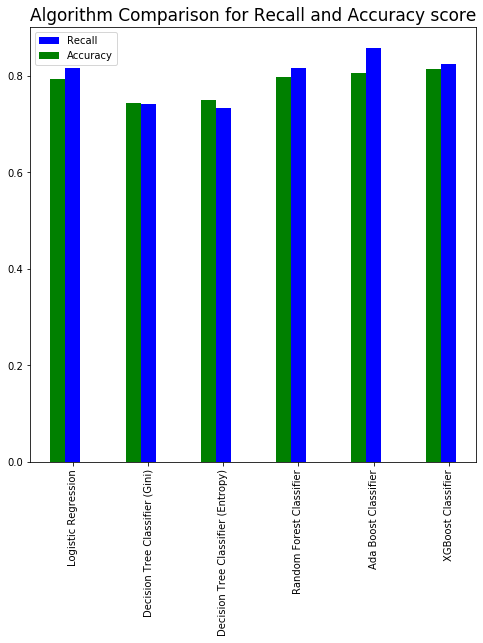

In [78]:
print('With SMOTE:')
model_building(models, X_SMOTE, y_SMOTE)

## Classification algorithms on SMOTE Tomek Data 

With SMOTETomek:
Logistic Regression
Accuracy SCORE:  0.8059701492537313
Recall SCORE:  0.8130841121495327
Confusion Matrix: 
 [[75 19]
 [20 87]]
ROC AUC SCORE:  0.8054782262875323
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.79        94
           1       0.82      0.81      0.82       107

    accuracy                           0.81       201
   macro avg       0.81      0.81      0.81       201
weighted avg       0.81      0.81      0.81       201

Decision Tree Classifier (Gini)
Accuracy SCORE:  0.835820895522388
Recall SCORE:  0.8411214953271028
Confusion Matrix: 
 [[78 16]
 [17 90]]
ROC AUC SCORE:  0.8354543646848279
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.83        94
           1       0.85      0.84      0.85       107

    accuracy                           0.84       201
   macro avg       0.84      0.84      0.84      

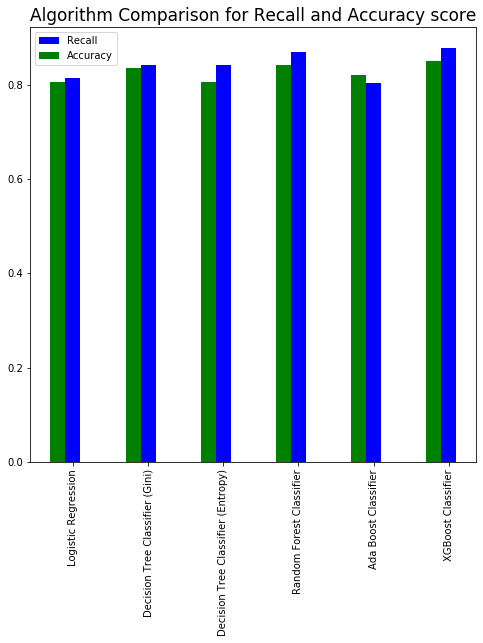

In [79]:
print('With SMOTETomek:')
model_building(models, X_tomek, y_tomek)